<a href="https://colab.research.google.com/github/andrewyu602/AI_DL/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# CH.4

## Boston Housing

In [18]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [19]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [20]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1) #Since it is a regression problem, we only utilize 1 for the output
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [21]:
num_epochs = 500
all_mae_histories = []
num_val_samples = len(train_data) // k
k = 4
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [22]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

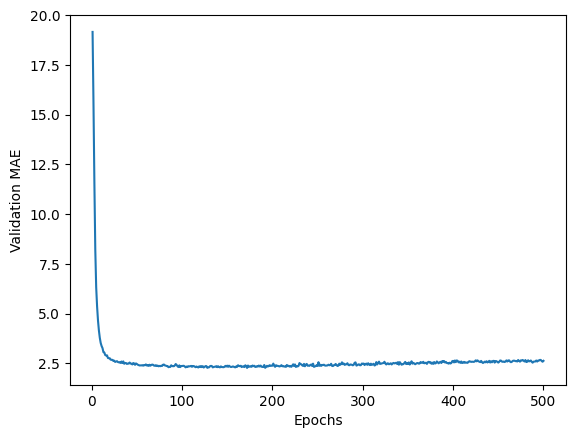

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

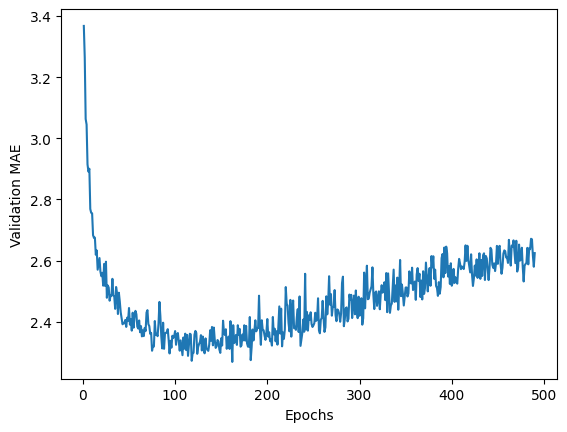

In [24]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [25]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 12.5001 - mae: 2.5227


In [26]:
predictions = model.predict(test_data)
predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[ 9.100366],
       [19.755136],
       [20.321037],
       [30.333612],
       [23.684938],
       [22.549177],
       [26.431479],
       [19.92325 ],
       [19.87619 ],
       [19.241179],
       [18.227892],
       [16.483831],
       [16.010567],
       [41.373585],
       [19.671587],
       [19.66028 ],
       [23.38085 ],
       [17.574495],
       [16.975191],
       [23.59862 ],
       [12.270995],
       [13.284357],
       [20.583065],
       [15.195841],
       [18.839228],
       [21.765036],
       [27.942144],
       [29.338367],
       [11.354743],
       [18.696709],
       [19.652952],
       [15.754359],
       [29.255182],
       [21.96256 ],
       [20.625277],
       [ 9.071975],
       [16.958158],
       [15.862191],
       [19.253902],
       [25.445969],
       [28.038855],
       [24.663443],
       [13.772387],
       [42.41041 ],
       [27.429295],
       [24.97043 ],
       [26.311092],
       [17.525908],
       [21.548338],
       [21.25252 ],


# CH. 5

## channels comparison

In [27]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [28]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_ori = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6961 - loss: 1.1084 - val_accuracy: 0.9009 - val_loss: 0.3140
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9113 - loss: 0.2828 - val_accuracy: 0.9087 - val_loss: 0.2865
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9455 - loss: 0.1791 - val_accuracy: 0.9490 - val_loss: 0.1674
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9595 - loss: 0.1241 - val_accuracy: 0.9604 - val_loss: 0.1326
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9735 - loss: 0.0840 - val_accuracy: 0.9563 - val_loss: 0.1462
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9796 - loss: 0.0636 - val_accuracy: 0.9513 - val_loss: 0.1720
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0468 - val_accuracy: 0.9473 - val_loss: 0.1806
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.

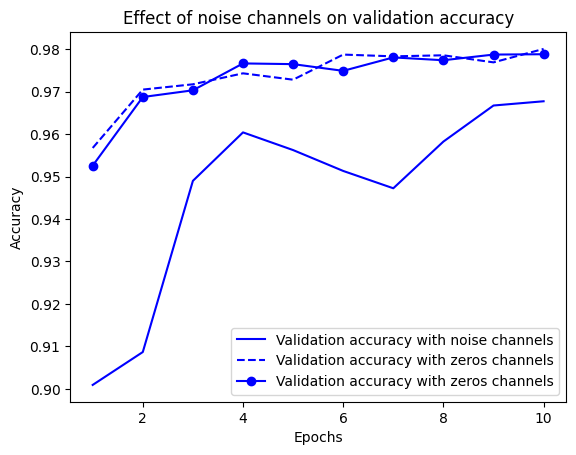

In [29]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_ori = history_ori.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_ori, "bo-",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## randomly shuffled

In [30]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_shuffled = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0998 - loss: 2.3348 - val_accuracy: 0.1067 - val_loss: 2.3037
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1193 - loss: 2.2984 - val_accuracy: 0.1019 - val_loss: 2.3115
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1279 - loss: 2.2905 - val_accuracy: 0.1050 - val_loss: 2.3165
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1397 - loss: 2.2765 - val_accuracy: 0.1028 - val_loss: 2.3232
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1550 - loss: 2.2597 - val_accuracy: 0.1001 - val_loss: 2.3325
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1723 - loss: 2.2392 - val_accuracy: 0.0987 - val_loss: 2.3446
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1835 - loss: 2.2176 - val_accuracy: 0.0948 - val_loss: 2.3610
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1991 - loss: 2.1888 - val_accu

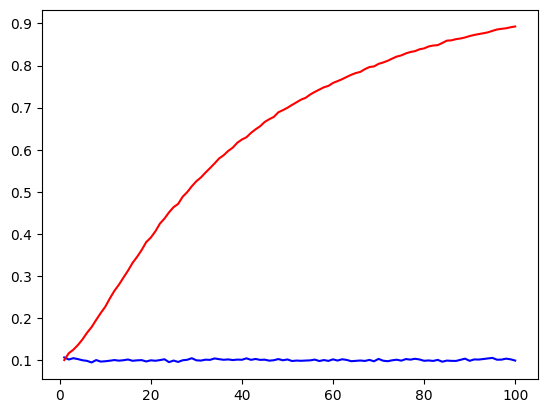

In [31]:
import matplotlib.pyplot as plt
val_acc_shuffled = history_shuffled.history['val_accuracy']
train_acc_shuffled = history_shuffled.history['accuracy']
epochs = range(1,101)
plt.plot(epochs, val_acc_shuffled, 'b', label = 'validation accuracy for shuffled')
plt.plot(epochs, train_acc_shuffled, 'r', label = 'training accuracy for shuffled')
plt.show()

## capacity

In [32]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.6910 - loss: 0.5952 - val_accuracy: 0.8678 - val_loss: 0.3758
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8953 - loss: 0.3205 - val_accuracy: 0.8762 - val_loss: 0.3141
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9219 - loss: 0.2392 - val_accuracy: 0.8888 - val_loss: 0.2826
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9416 - loss: 0.1823 - val_accuracy: 0.8853 - val_loss: 0.2885
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9519 - loss: 0.1515 - val_accuracy: 0.8895 - val_loss: 0.2790
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9641 - loss: 0.1252 - val_accuracy: 0.8808 - val_loss: 0.3076
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9687 - loss: 0.1078 - val_accuracy: 0.8703 - val_loss: 0.3556
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accura

In [33]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6108 - loss: 0.6551 - val_accuracy: 0.7240 - val_loss: 0.5784
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7848 - loss: 0.5527 - val_accuracy: 0.7982 - val_loss: 0.5129
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8646 - loss: 0.4788 - val_accuracy: 0.8443 - val_loss: 0.4491
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8946 - loss: 0.4074 - val_accuracy: 0.8723 - val_loss: 0.3933
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9093 - loss: 0.3473 - val_accuracy: 0.8888 - val_loss: 0.3527
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9271 - loss: 0.2907 - val_accuracy: 0.8867 - val_loss: 0.3211
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9314 - loss: 0.2557 - val_accuracy: 0.8922 - val_loss: 0.3005
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9378 - loss: 0.2239 - val_accuracy: 0.8911 - v

In [34]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6614 - loss: 0.6577 - val_accuracy: 0.8521 - val_loss: 0.3669
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8624 - loss: 0.3322 - val_accuracy: 0.8802 - val_loss: 0.2915
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9116 - loss: 0.2289 - val_accuracy: 0.8854 - val_loss: 0.2725
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9331 - loss: 0.1723 - val_accuracy: 0.8889 - val_loss: 0.2756
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9533 - loss: 0.1284 - val_accuracy: 0.8799 - val_loss: 0.3247
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9709 - loss: 0.0887 - val_accuracy: 0.8365 - val_loss: 0.4611
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9762 - loss: 0.0772 - val_accuracy: 0.8862 - val_loss: 0.3449
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9895 - loss: 0.0408 - val_accuracy: 0.8839 - 

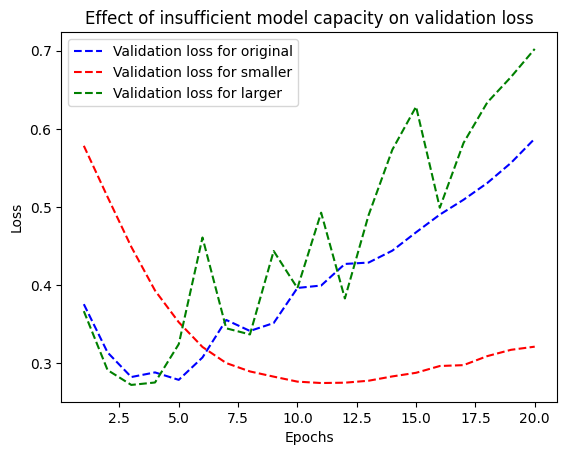

In [35]:
import matplotlib.pyplot as plt
val_loss_ori = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_ori, "b--",
         label="Validation loss for original")
plt.plot(epochs, val_loss_smaller, "r--",
         label="Validation loss for smaller")
plt.plot(epochs, val_loss_larger, "g--",
         label="Validation loss for larger")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()